<div style="border: 3px solid orange; border-radius: 30px; position: relative; width: 100%; height: 300px; display: flex; justify-content: center; align-items: center; background-color: #f0f0f0;">
    <img src="https://campustechnology.com/-/media/EDU/CampusTechnology/2021-images/20210121collegestudents.jpg" style="position: absolute; top: 0; left: 0; width: 100%; height: 100%; z-index: 0; opacity: 1.0;">
    <div style="position: relative; z-index: 1; text-align: center; background-color: rgba(50, 50, 50, 0.5); color: orange; display: flex; flex-direction: column; align-items: center; text-align: center; justify-content: center; width: 100%; margin: 10%; padding: 5px ">
            <h1 style="text-align: center; width: 100%" >Student Perfomance</h1>
            <h3 style="padding-top: 20px"> Atharva Date </h3>
    </div>
</div>

<h1 style="text-align: center; color: purple; background-color: rgba(255, 200, 180, 0.2); padding: 30px"> Imports & Load Data </h1>

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from scipy import stats

In [50]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

pd.options.mode.chained_assignment = None

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
sns.set()
sns.set_palette('PuOr')
SNS_CMAP = 'PuOr'

In [4]:
DATA_PATH = 'StudentsPerformance.csv'

In [5]:
df = pd.read_csv(DATA_PATH)

In [6]:
df.head().style.background_gradient(cmap='Purples')

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [7]:
df.describe()[1:].style.background_gradient(cmap='Oranges')

,math score,reading score,writing score
mean,66.089000,69.169000,68.054000
std,15.163080,14.600192,15.195657
min,0.000000,17.000000,10.000000
25%,57.000000,59.000000,57.750000
50%,66.000000,70.000000,69.000000
75%,77.000000,79.000000,79.000000
max,100.000000,100.000000,100.000000


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


<h1 style="text-align: center; color: purple; background-color: rgba(255, 200, 180, 0.2); padding: 30px"> EDA </h1>

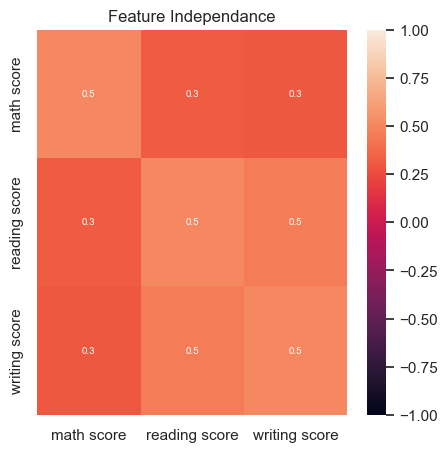

In [8]:
plt.figure(figsize=(5, 5))
plt.title("Feature Independance")
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
sns.heatmap(df.select_dtypes(include=numerics).corr()-0.5, cmap='rocket', annot=True, annot_kws={'fontsize':7}, fmt='.1g', vmin=-1, vmax=1, center= 0)
plt.show()

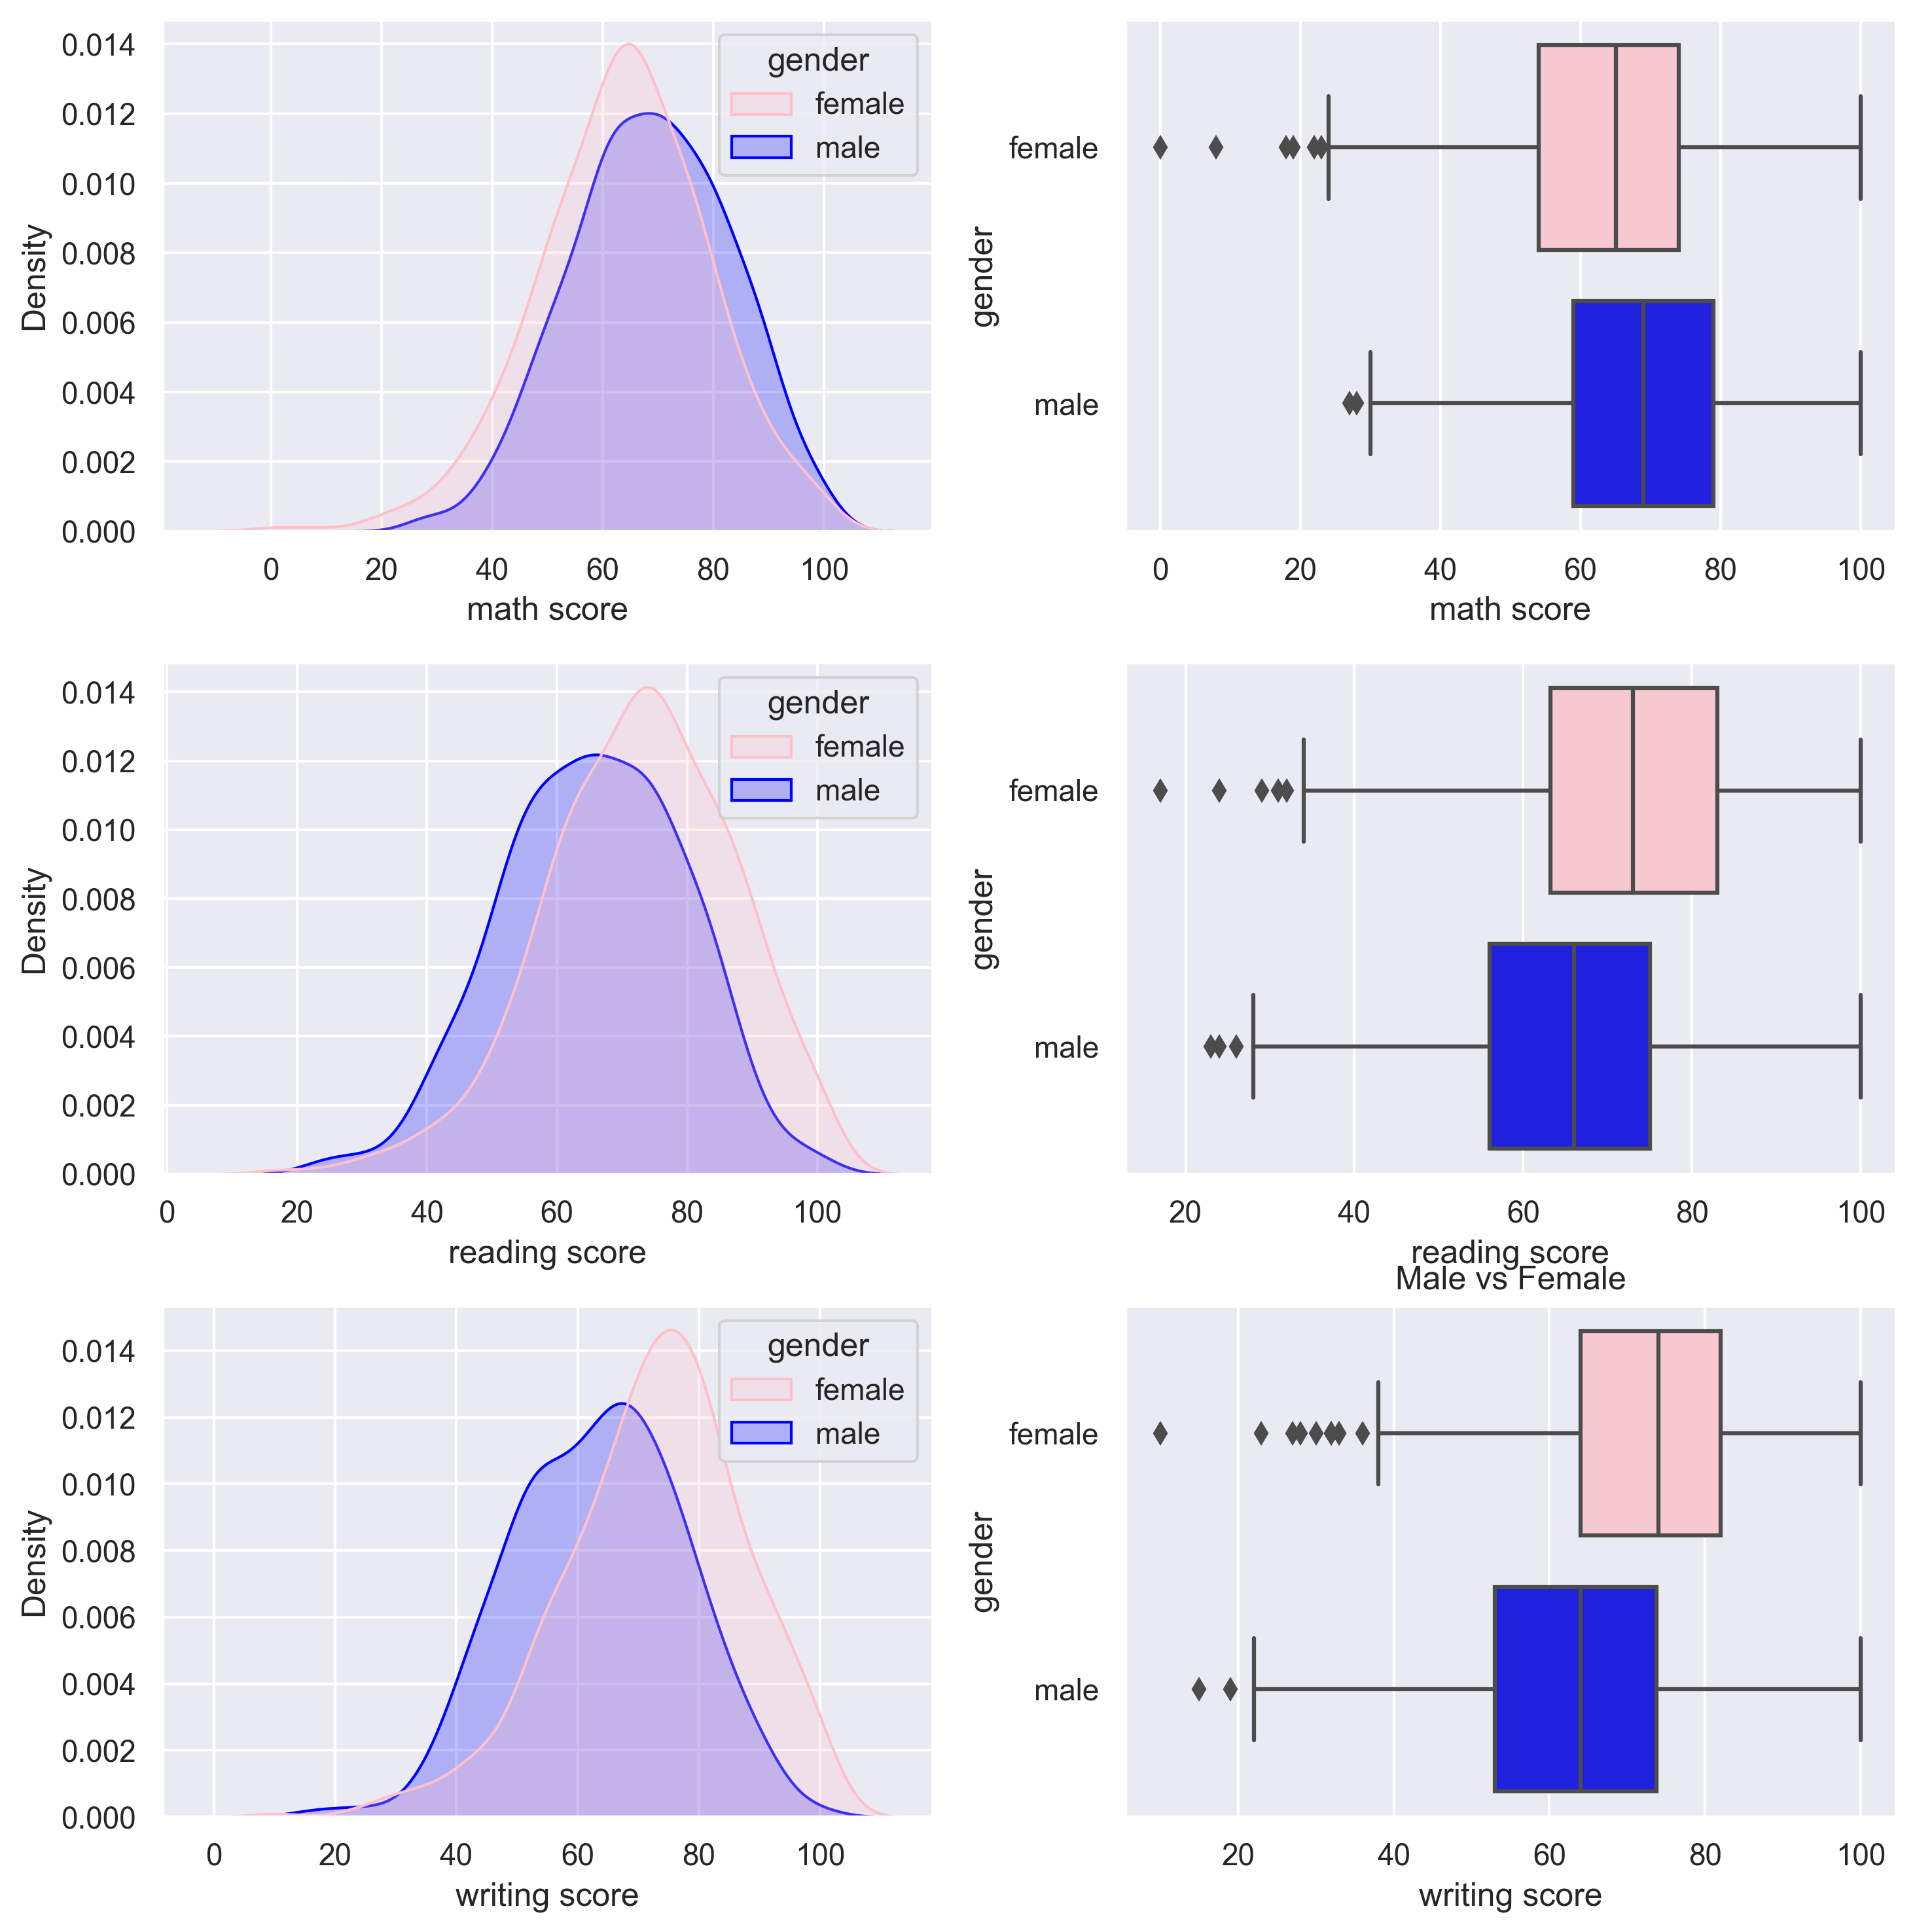

In [24]:
cols = ['math score', 'reading score',
       'writing score']
accent1 = {'female': 'pink', 'male': 'blue'}
n_columns = len(cols)
fig,axes = plt.subplots(n_columns, 2,figsize=(10, 10),dpi=300)
for i, col in enumerate(cols):
    sns.kdeplot(data = df, x=col, hue=df['gender'].astype(str), fill=True, ax=axes[i][0], palette=accent1)
    sns.boxplot(x=df[col], y=df['gender'].astype(str), ax=axes[i][1], palette=accent1)
fig.tight_layout()
plt.title('Male vs Female')
plt.show()

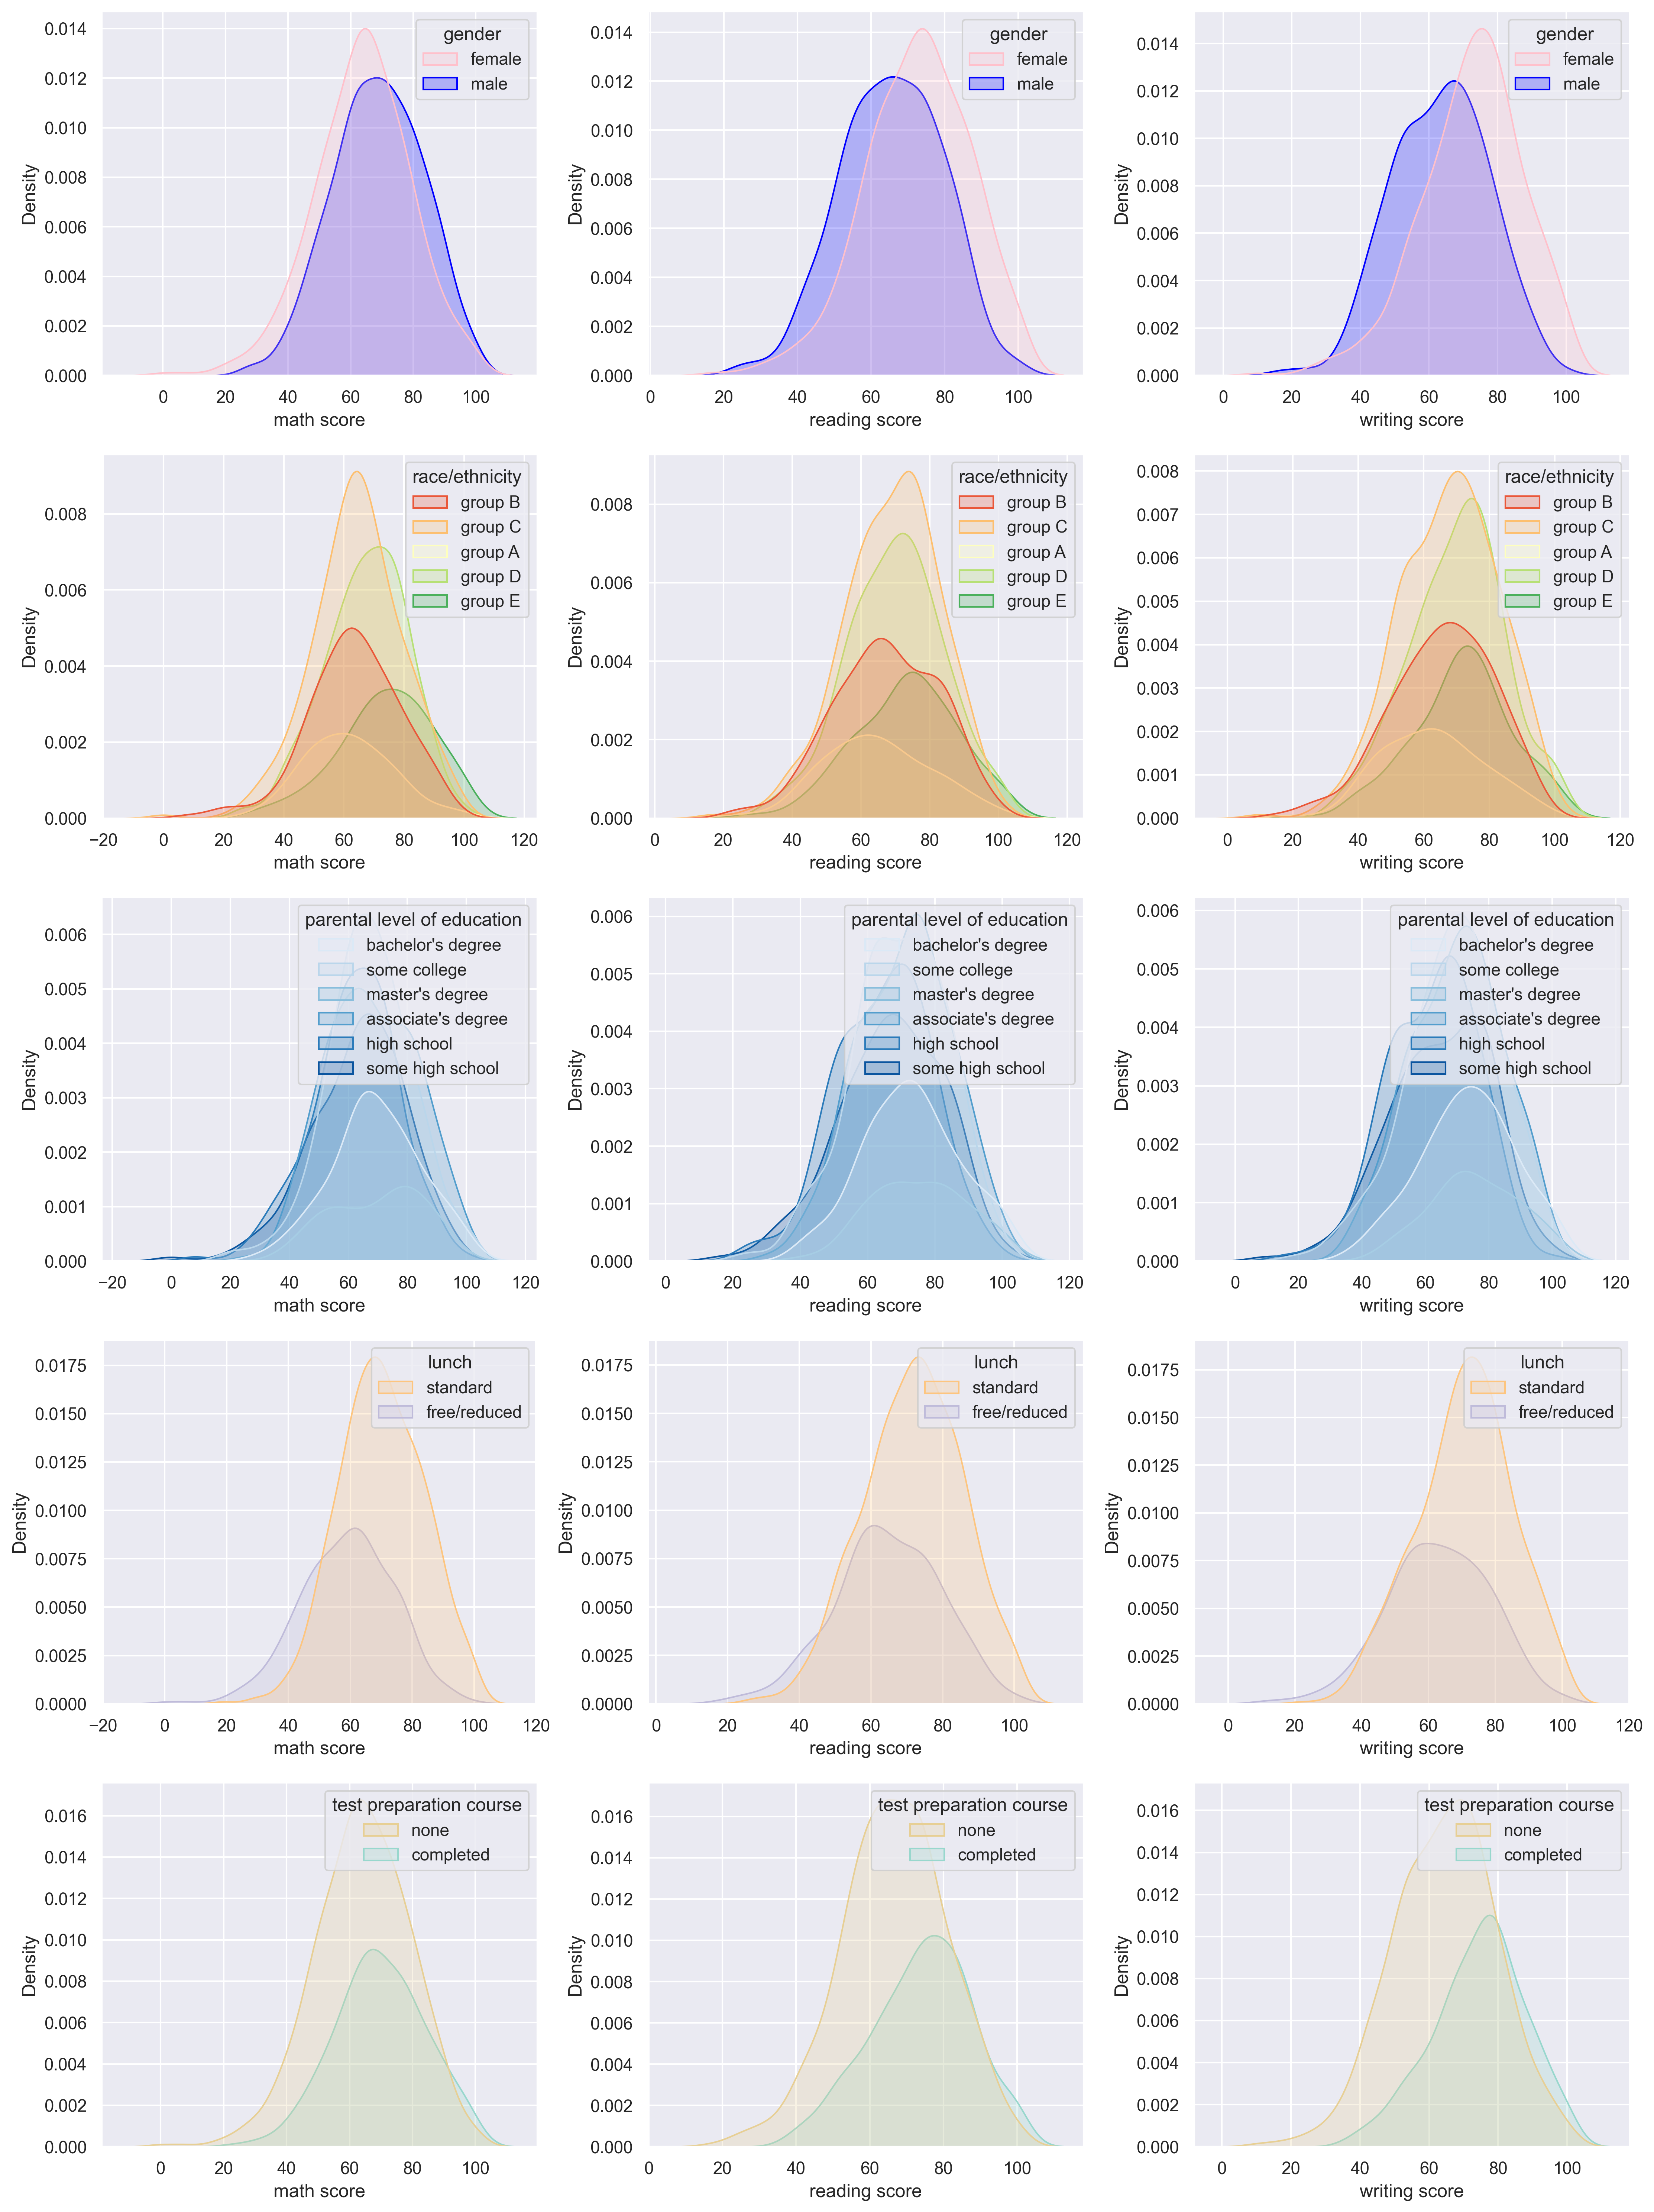

In [25]:
categorical_cols = ['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course']
data_cols = ['math score', 'reading score',
       'writing score']
palettes = [ {'female': 'pink', 'male': 'blue'}, 'RdYlGn', 'Blues', 'PuOr', 'BrBG']
n_cat = len(categorical_cols)
fig,axes = plt.subplots(n_cat, 3,figsize=(15, 20),dpi=300)

for i, hue in enumerate(categorical_cols):
  for j, col in enumerate(data_cols):
    sns.kdeplot(data = df, x=col, hue=df[hue].astype(str), fill=True, ax=axes[i][j], palette=palettes[i])

fig.tight_layout()
plt.show()

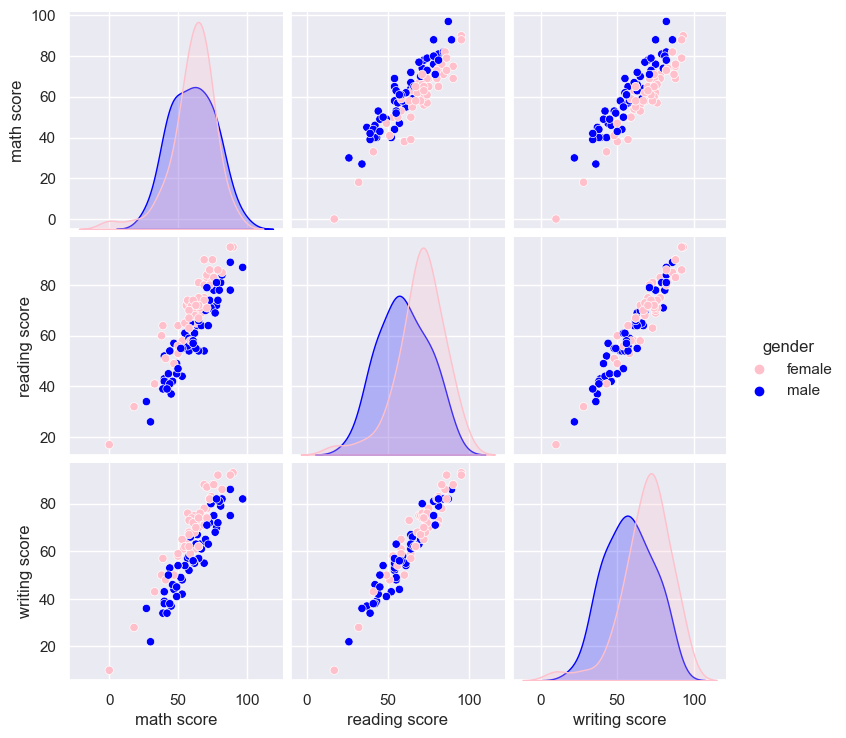

In [26]:
df['gender']=df['gender'].astype(str)
sns.pairplot(df.iloc[:100], hue='gender', palette={'female': 'pink', 'male': 'blue'})
plt.show()

<h1 style="text-align: center; color: purple; background-color: rgba(255, 200, 180, 0.2); padding: 30px"> Pre-Processing </h1>

In [57]:
categorical_cols = ['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course']
data_cols = ['math score', 'reading score',
       'writing score']

In [58]:
df_trans = df.copy()

<h2 style="text-align: center; color: #9966cc; background-color: rgba(255, 200, 180, 0.2); padding: 10px"> Scaling </h2>

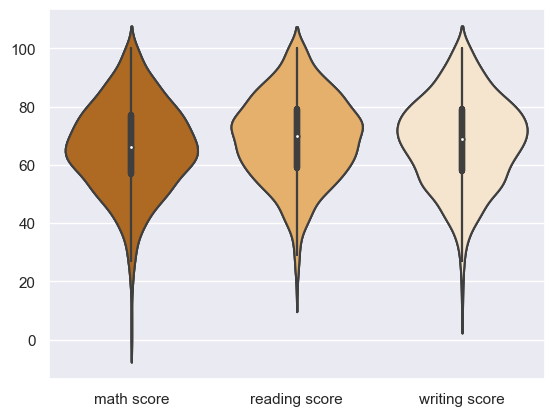

In [11]:
for col in df[data_cols]:
  sns.violinplot(df)

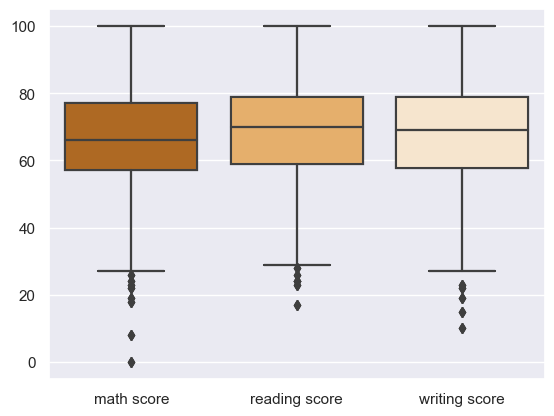

In [30]:
for col in df[data_cols]:
  sns.boxplot(df)

We need to perform outlier removal before scaling our data

<h2 style="text-align: center; color: #9966cc; background-color: rgba(255, 200, 180, 0.2); padding: 10px"> Outlier Removal </h2>

In [12]:
from scipy import stats

In [59]:
z = np.abs(stats.zscore(df_trans[data_cols]))

In [60]:
df_trans = df_trans[(z<2).any(axis=1)]

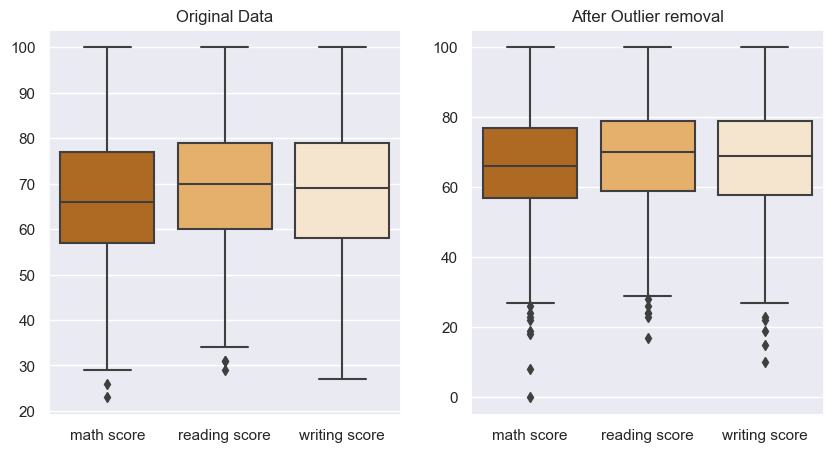

In [61]:
fig, axes = plt.subplots(1, 2, figsize = (10, 5))
sns.boxplot(df_trans, ax=axes[0])
axes[0].set_title("Original Data")
sns.boxplot(df, ax=axes[1])
axes[1].set_title("After Outlier removal")
plt.show()

<h2 style="text-align: center; color: #9966cc; background-color: rgba(255, 200, 180, 0.2); padding: 10px"> Scaling </h2>

In [64]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer

In [62]:
mms = MinMaxScaler()
df_trans_mms = df_trans.copy()
df_trans_mms[data_cols] = mms.fit_transform(df_trans[data_cols])

MinMaxScaler()

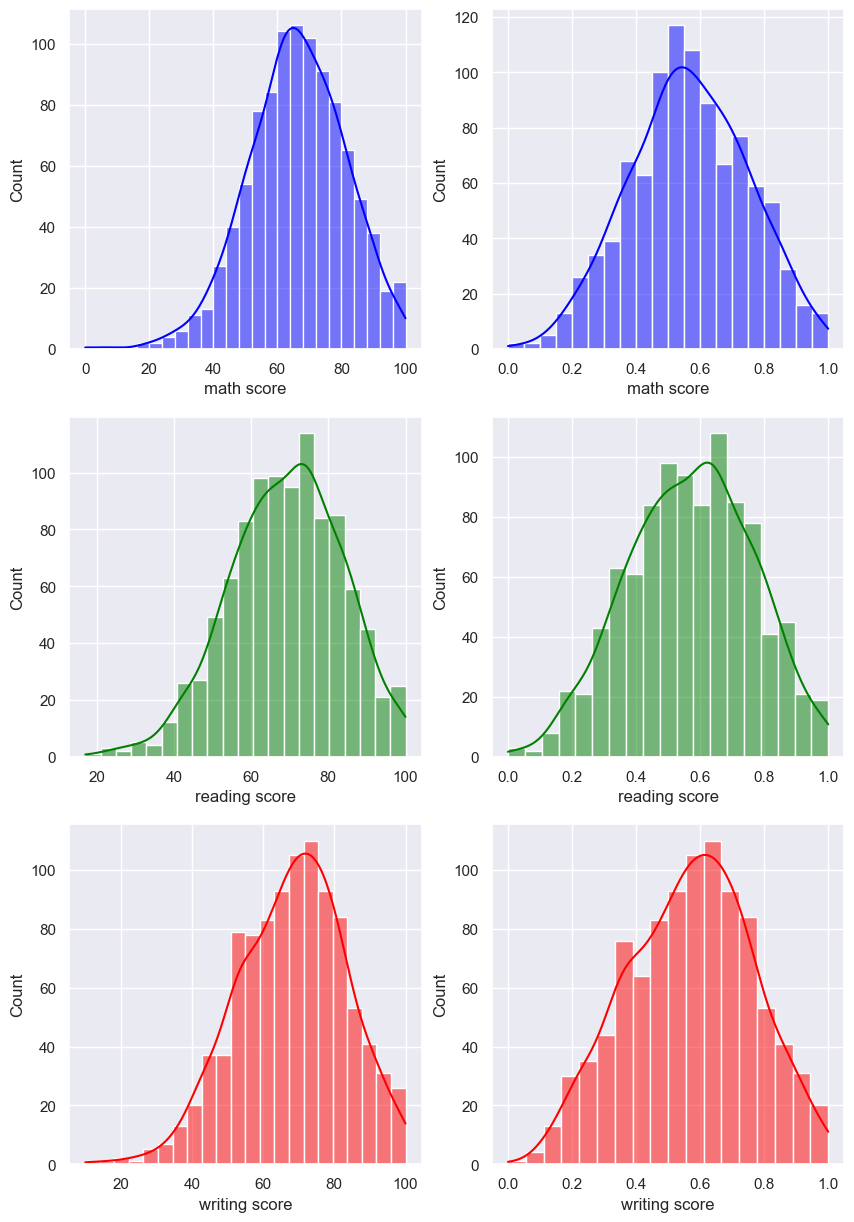

In [63]:
fig, axes = plt.subplots(3, 2, figsize=(10, 15))
colors = ['blue', 'green', 'red']
for i, col in enumerate(data_cols):
    sns.histplot(df[col], ax=axes[i, 0], kde=True, color=colors[i])
    sns.histplot(df_trans_mms[col], ax=axes[i, 1], kde=True, color=colors[i])

In [65]:
norm = Normalizer()
df_trans_norm = df_trans.copy()
df_trans_norm[data_cols] = norm.fit_transform(df_trans[data_cols])

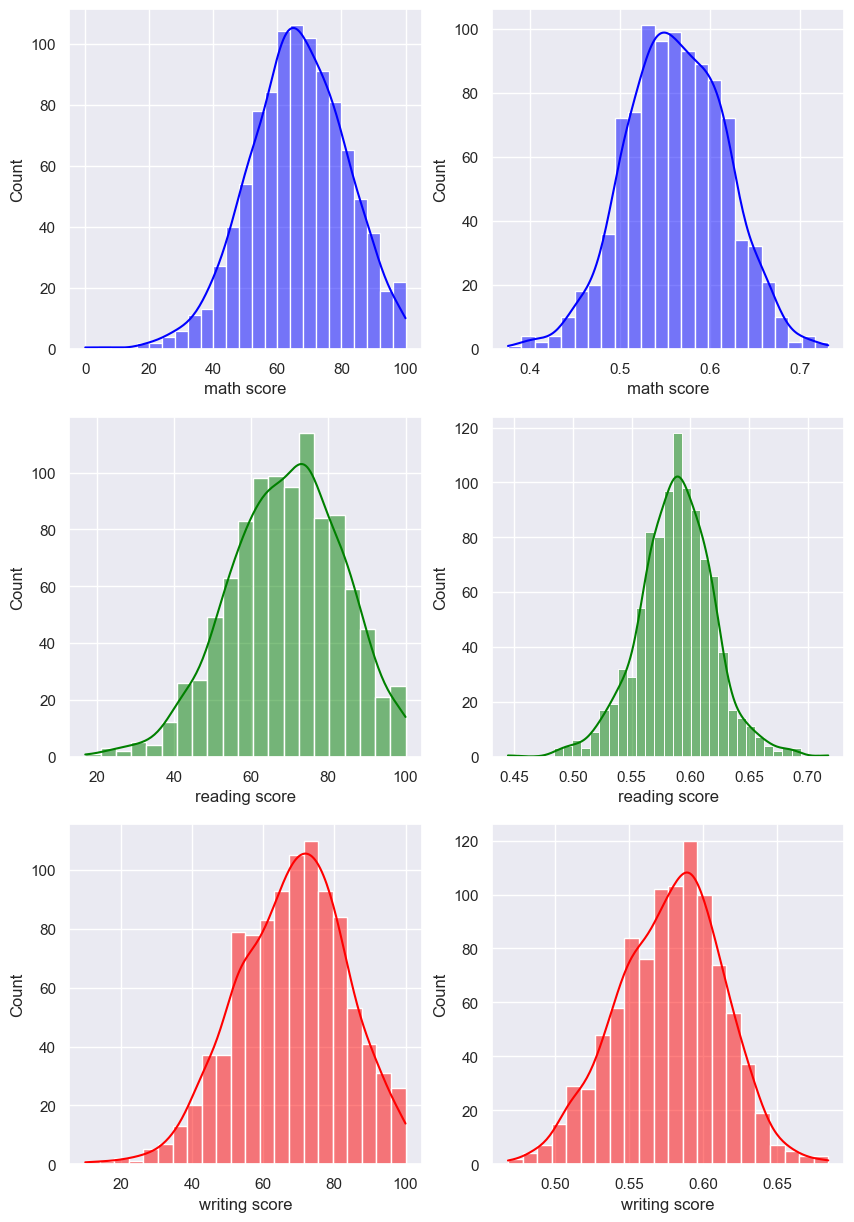

In [66]:
fig, axes = plt.subplots(3, 2, figsize=(10, 15))
colors = ['blue', 'green', 'red']
for i, col in enumerate(data_cols):
    sns.histplot(df[col], ax=axes[i, 0], kde=True, color=colors[i])
    sns.histplot(df_trans_norm[col], ax=axes[i, 1], kde=True, color=colors[i])

<h2 style="text-align: center; color: #9966cc; background-color: rgba(255, 200, 180, 0.2); padding: 10px"> Encoding </h2>

In [68]:
from sklearn.preprocessing import OrdinalEncoder

In [70]:
oe = OrdinalEncoder()
df_trans[categorical_cols] = oe.fit_transform(df_trans[categorical_cols])

In [71]:
df_trans.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0.0,1.0,1.0,1.0,1.0,72,72,74
1,0.0,2.0,4.0,1.0,0.0,69,90,88
2,0.0,1.0,3.0,1.0,1.0,90,95,93
3,1.0,0.0,0.0,0.0,1.0,47,57,44
4,1.0,2.0,4.0,1.0,1.0,76,78,75
